# Resume Classification
### Business objective: The document classification solution should significantly reduce the manual human effort in the HRM. It should achieve a higher level of accuracy and automation with minimal human intervention

In [1]:
import os
import re
import nltk
import spacy
import string
import textract
import pandas as pd
import seaborn as sns
from matplotlib import pylab
from matplotlib import pyplot as plt
from matplotlib import rcParams
from textblob import TextBlob

import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, classification_report, precision_score, recall_score


import warnings
warnings.filterwarnings('ignore')

In [2]:
os.listdir(r"D:\Resumes")

['Peoplesoft resumes',
 'React Developer',
 'SQL Developer Lightning insight',
 'workday resumes']

In [3]:
file_path1=[]
category1=[]
path_loc1=r"D:\Resumes\Peoplesoft resumes"
for i in os.listdir(path_loc1):# file ittreation
    if i.endswith(".docx"): # file end .docx
        os.path.join(path_loc1,i)
        file_path1.append((textract.process(os.path.join(path_loc1,i))).decode('utf-8'))
        category1.append("Peoplesoft resumes")
df1 = pd.DataFrame(data=file_path1, columns=["RAW_DETAILS"])
df1["Category1"] = category1
df1.head()

,RAW_DETAILS,Category1
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,Peoplesoft resumes
1,Classification: Internal\n\nClassification: In...,Peoplesoft resumes
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",Peoplesoft resumes
3,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,Peoplesoft resumes
4,PeopleSoft Administration\n\n \n\nVivekanand S...,Peoplesoft resumes


In [4]:
file_path2=[]
category2=[]
path_loc2=r"D:\Resumes\React Developer"
for i in os.listdir(path_loc2): # file ittreation
    if i.endswith(".docx"): # file end .docx
        os.path.join(path_loc2,i)
        file_path2.append((textract.process(os.path.join(path_loc2,i))).decode('utf-8'))
        category2.append("Reactjs")
df2 = pd.DataFrame(data=file_path2, columns=["RAW_DETAILS"])
df2["Category2"] = category2
df2.head()

,RAW_DETAILS,Category2
0,Name: Ravali P \n\n\n\n ...,Reactjs
1,SUSOVAN BAG \n\nSeeking a challenging po...,Reactjs
2,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,Reactjs
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,Reactjs
4,KAMALAKAR REDDY. A \n\nLinked In: https://www....,Reactjs


In [5]:
file_path3=[]
category3=[]
path_loc3=r"D:\Resumes\SQL Developer Lightning insight"
for i in os.listdir(path_loc3): # file ittreation
    if i.endswith(".docx"): # file end .docx
        os.path.join(path_loc3,i)
        file_path3.append((textract.process(os.path.join(path_loc3,i))).decode('utf-8'))
        category3.append("SQL Developer Lightning insight")
df3 = pd.DataFrame(data=file_path3, columns=["RAW_DETAILS"])
df3["Category3"] = category3
df3.head()

,RAW_DETAILS,Category3
0,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,SQL Developer Lightning insight
1,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...,SQL Developer Lightning insight
2,BUDDHA VAMSI ...,SQL Developer Lightning insight
3,KAMBALLA PRADEEP ...,SQL Developer Lightning insight
4,Resume\n\nName : Neeraj Mishra\n\n\n\nExp...,SQL Developer Lightning insight


In [6]:
file_path4=[]
category4=[]
path_loc4=r"D:\Resumes\workday resumes"
for i in os.listdir(path_loc4): # file ittreation
    if i.endswith(".docx"): # file check end .docx
        os.path.join(path_loc4,i)
        file_path4.append((textract.process(os.path.join(path_loc4,i))).decode('utf-8'))
        category4.append("workday resumes")
df4 = pd.DataFrame(data=file_path4, columns=["RAW_DETAILS"])
df4["Category4"] = category4
df4.head()

,RAW_DETAILS,Category4
0,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,workday resumes
1,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...,workday resumes
2,G Himaja\n\n ...,workday resumes
3,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,workday resumes
4,Mooraboyina Guravaiah\n\nWorkday Integration S...,workday resumes


In [7]:
data = pd.concat([df1, df2, df3, df4], ignore_index=True)
data.head()

,RAW_DETAILS,Category1,Category2,Category3,Category4
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,Peoplesoft resumes,NaN,NaN,NaN
1,Classification: Internal\n\nClassification: In...,Peoplesoft resumes,NaN,NaN,NaN
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",Peoplesoft resumes,NaN,NaN,NaN
3,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,Peoplesoft resumes,NaN,NaN,NaN
4,PeopleSoft Administration\n\n \n\nVivekanand S...,Peoplesoft resumes,NaN,NaN,NaN


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   RAW_DETAILS  52 non-null     object
 1   Category1    10 non-null     object
 2   Category2    20 non-null     object
 3   Category3    11 non-null     object
 4   Category4    11 non-null     object
dtypes: object(5)
memory usage: 2.2+ KB


### Merge all Unnecessary column in One Column

In [9]:
data['Category'] = category1 + category2 + category3 + category4
data.head()

,RAW_DETAILS,Category1,Category2,Category3,Category4,Category
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,Peoplesoft resumes,NaN,NaN,NaN,Peoplesoft resumes
1,Classification: Internal\n\nClassification: In...,Peoplesoft resumes,NaN,NaN,NaN,Peoplesoft resumes
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",Peoplesoft resumes,NaN,NaN,NaN,Peoplesoft resumes
3,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,Peoplesoft resumes,NaN,NaN,NaN,Peoplesoft resumes
4,PeopleSoft Administration\n\n \n\nVivekanand S...,Peoplesoft resumes,NaN,NaN,NaN,Peoplesoft resumes


In [10]:
data["RAW_DETAILS"][0]

'Anubhav Kumar Singh\t\t\n\n\n\nCore Competencies:\n\n\n\nScripting\t\t: Shell Scripting\n\n\n\nApplication\t\t: PeopleSoft HCM, FINANCIALS\n\n\n\nOperating System\t: Linux ,Windows\n\n\n\nWeb/App Servers\t: Weblogic, Tuxedo\n\n\n\nRDBMS\t\t: Oracle\n\n\n\nRepository \t\t: Github\n\n\n\nCore Competencies:\n\n\n\nScripting\t\t: Shell Scripting\n\n\n\nApplication\t\t: PeopleSoft HCM, FINANCIALS\n\n\n\nOperating System\t: Linux ,Windows\n\n\n\nWeb/App Servers\t: Weblogic, Tuxedo\n\n\n\nRDBMS\t\t: Oracle\n\n\n\nRepository \t\t: Github\n\n\n\n  To work in a globally competitive environment on \n\n  challenging assignments that shall yield the \n\n  twin benefits of the job satisfaction and a steady-paced \n\n  professional growth.\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n \n\n\n\n\n\n Professional Experience\n\n\n\n 06/2019 - Current\tHCL\t\t\t\t\t\t\t\t\t\t\n\n\t\t\tCurrent Role: System Admin Offshore\n\n\t\t\tSkills : Shell Scripting, Linux , PeopleSoft Administration , Github\n\n\n\nManag

In [11]:
data.to_csv('resume.csv', index=False)
data.head()

,RAW_DETAILS,Category1,Category2,Category3,Category4,Category
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,Peoplesoft resumes,NaN,NaN,NaN,Peoplesoft resumes
1,Classification: Internal\n\nClassification: In...,Peoplesoft resumes,NaN,NaN,NaN,Peoplesoft resumes
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",Peoplesoft resumes,NaN,NaN,NaN,Peoplesoft resumes
3,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,Peoplesoft resumes,NaN,NaN,NaN,Peoplesoft resumes
4,PeopleSoft Administration\n\n \n\nVivekanand S...,Peoplesoft resumes,NaN,NaN,NaN,Peoplesoft resumes


In [12]:
data=pd.read_csv("resume.csv")

In [13]:
data.head()

,RAW_DETAILS,Category1,Category2,Category3,Category4,Category
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,Peoplesoft resumes,NaN,NaN,NaN,Peoplesoft resumes
1,Classification: Internal\n\nClassification: In...,Peoplesoft resumes,NaN,NaN,NaN,Peoplesoft resumes
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",Peoplesoft resumes,NaN,NaN,NaN,Peoplesoft resumes
3,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,Peoplesoft resumes,NaN,NaN,NaN,Peoplesoft resumes
4,PeopleSoft Administration\n\n \n\nVivekanand S...,Peoplesoft resumes,NaN,NaN,NaN,Peoplesoft resumes


In [14]:
data[data.Category=="Peoplesoft resumes"]

,RAW_DETAILS,Category1,Category2,Category3,Category4,Category
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,Peoplesoft resumes,NaN,NaN,NaN,Peoplesoft resumes
1,Classification: Internal\n\nClassification: In...,Peoplesoft resumes,NaN,NaN,NaN,Peoplesoft resumes
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",Peoplesoft resumes,NaN,NaN,NaN,Peoplesoft resumes
3,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,Peoplesoft resumes,NaN,NaN,NaN,Peoplesoft resumes
4,PeopleSoft Administration\n\n \n\nVivekanand S...,Peoplesoft resumes,NaN,NaN,NaN,Peoplesoft resumes
5,Hari Narayana \t\t \n\n\t\n\n\n\n...,Peoplesoft resumes,NaN,NaN,NaN,Peoplesoft resumes
6,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,Peoplesoft resumes,NaN,NaN,NaN,Peoplesoft resumes
7,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,Peoplesoft resumes,NaN,NaN,NaN,Peoplesoft resumes
8,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,Peoplesoft resumes,NaN,NaN,NaN,Peoplesoft resumes
9,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,Peoplesoft resumes,NaN,NaN,NaN,Peoplesoft resumes


In [15]:
data.isnull().sum()

RAW_DETAILS     0
Category1      42
Category2      32
Category3      41
Category4      41
Category        0
dtype: int64

In [16]:
data.columns = data.columns.str.lower()

data.drop(['category1', 'category2', 'category3', 'category4'], axis=1, errors='ignore', inplace=True)

data = data[["raw_details", "category"]]

print(data.head())

                                         raw_details            category
0  Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...  Peoplesoft resumes
1  Classification: Internal\n\nClassification: In...  Peoplesoft resumes
2  SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...  Peoplesoft resumes
3  PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...  Peoplesoft resumes
4  PeopleSoft Administration\n\n \n\nVivekanand S...  Peoplesoft resumes


### Number of Words in each Resume

In [17]:
data['Raw_Details'] = data['raw_details'].fillna("").astype(str) #  Raw_Details is a string and handle NaN values
word_counts = []
for detail in data['raw_details']:
    words = detail.split(" ")  # Split the string into words
    word_counts.append(len(words))  # Count the words and store the result
data['Word_Count'] = word_counts
print(data[['raw_details', 'Word_Count']].head())

                                         raw_details  Word_Count
0  Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...        1023
1  Classification: Internal\n\nClassification: In...         558
2  SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...         455
3  PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...         918
4  PeopleSoft Administration\n\n \n\nVivekanand S...        2585


### Number of Characters

In [18]:
data['Char_Count'] = data['raw_details'].str.len() ## this also includes spaces
data[['raw_details','Char_Count']].head()

,raw_details,Char_Count
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,8010
1,Classification: Internal\n\nClassification: In...,4917
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",3800
3,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,7943
4,PeopleSoft Administration\n\n \n\nVivekanand S...,16112


### Number of Stopwords

In [19]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['Stopwords'] =data['raw_details'].apply(lambda x: len([x for x in x.split() if x in stop]))
data[['raw_details','Stopwords']].head()

,raw_details,Stopwords
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,190
1,Classification: Internal\n\nClassification: In...,114
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",86
3,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,225
4,PeopleSoft Administration\n\n \n\nVivekanand S...,520


### Number of Numerics

In [20]:
data['Numerics'] = data['raw_details'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
data[['raw_details','Numerics']].head()

,raw_details,Numerics
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,4
1,Classification: Internal\n\nClassification: In...,7
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",15
3,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,4
4,PeopleSoft Administration\n\n \n\nVivekanand S...,17


In [21]:
data.head()

,raw_details,category,Raw_Details,Word_Count,Char_Count,Stopwords,Numerics
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,Peoplesoft resumes,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,1023,8010,190,4
1,Classification: Internal\n\nClassification: In...,Peoplesoft resumes,Classification: Internal\n\nClassification: In...,558,4917,114,7
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",Peoplesoft resumes,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",455,3800,86,15
3,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,Peoplesoft resumes,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,918,7943,225,4
4,PeopleSoft Administration\n\n \n\nVivekanand S...,Peoplesoft resumes,PeopleSoft Administration\n\n \n\nVivekanand S...,2585,16112,520,17


## 2.Text Pre-Processing

### 1 Using Regular Expression

In [22]:
def preprocess(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url = re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]


    return " ".join(filtered_words)

In [23]:
from nltk.tokenize import RegexpTokenizer
data = pd.read_csv('resume.csv')
data['resume_details'] = data.RAW_DETAILS.apply(lambda x: preprocess(x))

In [24]:
data.head()

,RAW_DETAILS,Category1,Category2,Category3,Category4,Category,resume_details
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,Peoplesoft resumes,NaN,NaN,NaN,Peoplesoft resumes,anubhav kumar singh core competencies scriptin...
1,Classification: Internal\n\nClassification: In...,Peoplesoft resumes,NaN,NaN,NaN,Peoplesoft resumes,classification internal classification interna...
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",Peoplesoft resumes,NaN,NaN,NaN,Peoplesoft resumes,sirazuddin bangalore india sirazuddin bangalor...
3,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,Peoplesoft resumes,NaN,NaN,NaN,Peoplesoft resumes,peoplesoft admin varkala vikas career objectiv...
4,PeopleSoft Administration\n\n \n\nVivekanand S...,Peoplesoft resumes,NaN,NaN,NaN,Peoplesoft resumes,peoplesoft administration vivekanand sayana ca...


### 2.drop the RAW_DETAILS

In [25]:
data.drop(['RAW_DETAILS'], axis = 1, inplace = True)
data.head()

,Category1,Category2,Category3,Category4,Category,resume_details
0,Peoplesoft resumes,NaN,NaN,NaN,Peoplesoft resumes,anubhav kumar singh core competencies scriptin...
1,Peoplesoft resumes,NaN,NaN,NaN,Peoplesoft resumes,classification internal classification interna...
2,Peoplesoft resumes,NaN,NaN,NaN,Peoplesoft resumes,sirazuddin bangalore india sirazuddin bangalor...
3,Peoplesoft resumes,NaN,NaN,NaN,Peoplesoft resumes,peoplesoft admin varkala vikas career objectiv...
4,Peoplesoft resumes,NaN,NaN,NaN,Peoplesoft resumes,peoplesoft administration vivekanand sayana ca...


### 3. Save the Cleaned Resumes file

In [26]:
data.to_csv('Cleaned_Resumes.csv', index = False)

In [27]:
data=pd.read_csv("Cleaned_Resumes.csv") # read the file
data.head()

,Category1,Category2,Category3,Category4,Category,resume_details
0,Peoplesoft resumes,NaN,NaN,NaN,Peoplesoft resumes,anubhav kumar singh core competencies scriptin...
1,Peoplesoft resumes,NaN,NaN,NaN,Peoplesoft resumes,classification internal classification interna...
2,Peoplesoft resumes,NaN,NaN,NaN,Peoplesoft resumes,sirazuddin bangalore india sirazuddin bangalor...
3,Peoplesoft resumes,NaN,NaN,NaN,Peoplesoft resumes,peoplesoft admin varkala vikas career objectiv...
4,Peoplesoft resumes,NaN,NaN,NaN,Peoplesoft resumes,peoplesoft administration vivekanand sayana ca...


### Checking the resumes in index values 

In [28]:
data.resume_details[1]

'classification internal classification internal murali experience summary years experience working peoplesoft administration performing various infrastructure related activities peoplesoft environments installed configured peoplesoft web server application server database server process scheduler server windows unix linux platforms creating domains web server application server process scheduler server applied patches manually applied maintenance packs change assistant tool experience dpks installations applying tax updates fixes using pum migrating projects one environment another environment using application designer also capi stat tools performed single sign sso implementation experience running compare reports pre post migrations experience setting client workstation developers testers involved configuration integration broker setting modules sending messages involved production support client involved running audit reports dddaudit sysaudit integrity checks experience configurat

## Named Entity Recognition (NER)

In [29]:
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = data['resume_details'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = preprocess(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('experience', 330), ('using', 253), ('workday', 232), ('sql', 213), ('application', 208), ('server', 188), ('project', 183), ('data', 180), ('reports', 170), ('peoplesoft', 169), ('business', 165), ('web', 145), ('knowledge', 136), ('react', 132), ('process', 123), ('skills', 118), ('system', 116), ('good', 108), ('client', 105), ('tools', 102), ('working', 101), ('involved', 99), ('database', 99), ('various', 97), ('creating', 97), ('hcm', 94), ('support', 94), ('like', 94), ('developer', 94), ('worked', 93), ('integrations', 92), ('development', 91), ('technical', 89), ('integration', 87), ('servers', 86), ('services', 85), ('report', 83), ('people', 81), ('created', 80), ('html', 80), ('design', 78), ('used', 77), ('role', 74), ('team', 74), ('responsibilities', 72), ('work', 71), ('studio', 71), ('eib', 71), ('testing', 70), ('professional', 69)]


In [30]:
#spacy.cli.download("en_core_web_lg")

### Parts Of Speech (POS) Tagging

In [31]:
nlp = spacy.load('en_core_web_lg')

one_block = cleanedSentences[1300:5200]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style= 'ent', jupyter= True)

In [32]:
for token in doc_block[:20]:
    print(token,token.pos_)  #words, punctuation, etc. and their corresponding parts of speech (POS) tags. Here's a breakdown:
# token.pos_: The part of speech (POS) tag, which indicates the grammatical role of the word (like noun, verb, adjective, etc.).
    
# For example, if doc_block contains the sentence "I love coding!", the output might be:


# I PRON
# love VERB
# coding NOUN
# ! PUNCT

d PROPN
pum PROPN
peoplesoft PROPN
update NOUN
manager NOUN
installation NOUN
dpk PROPN
working VERB
knowledge NOUN
ansible ADJ
docker NOUN
developing VERB
new ADJ
shell NOUN
scripts NOUN
troubleshooting VERB
shell NOUN
script NOUN
failures NOUN
techmahindra PROPN


## Filtering out only the Nouns and Verbs from the Text to Tokens

In [33]:
one_block = cleanedSentences
doc_block = nlp(one_block)
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[:20])

['competencies', 'scripting', 'shell', 'scripting', 'application', 'financials', 'operating', 'system', 'web', 'app', 'servers', 'rdbms', 'competencies', 'scripting', 'shell', 'scripting', 'application', 'financials', 'operating', 'system']


## Counting all the Nouns and Verbs present in the Tokens of words

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)

words_freq = [(word,sum_words[0,idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['Words','Count']
wd_df[0:15]

,Words,Count
0,experience,298
1,using,243
2,application,207
3,workday,193
4,reports,170
5,data,170
6,project,167
7,business,158
8,web,140
9,react,132


## Visualizing the Result of Top 20 Nouns and Verbs most Frequently

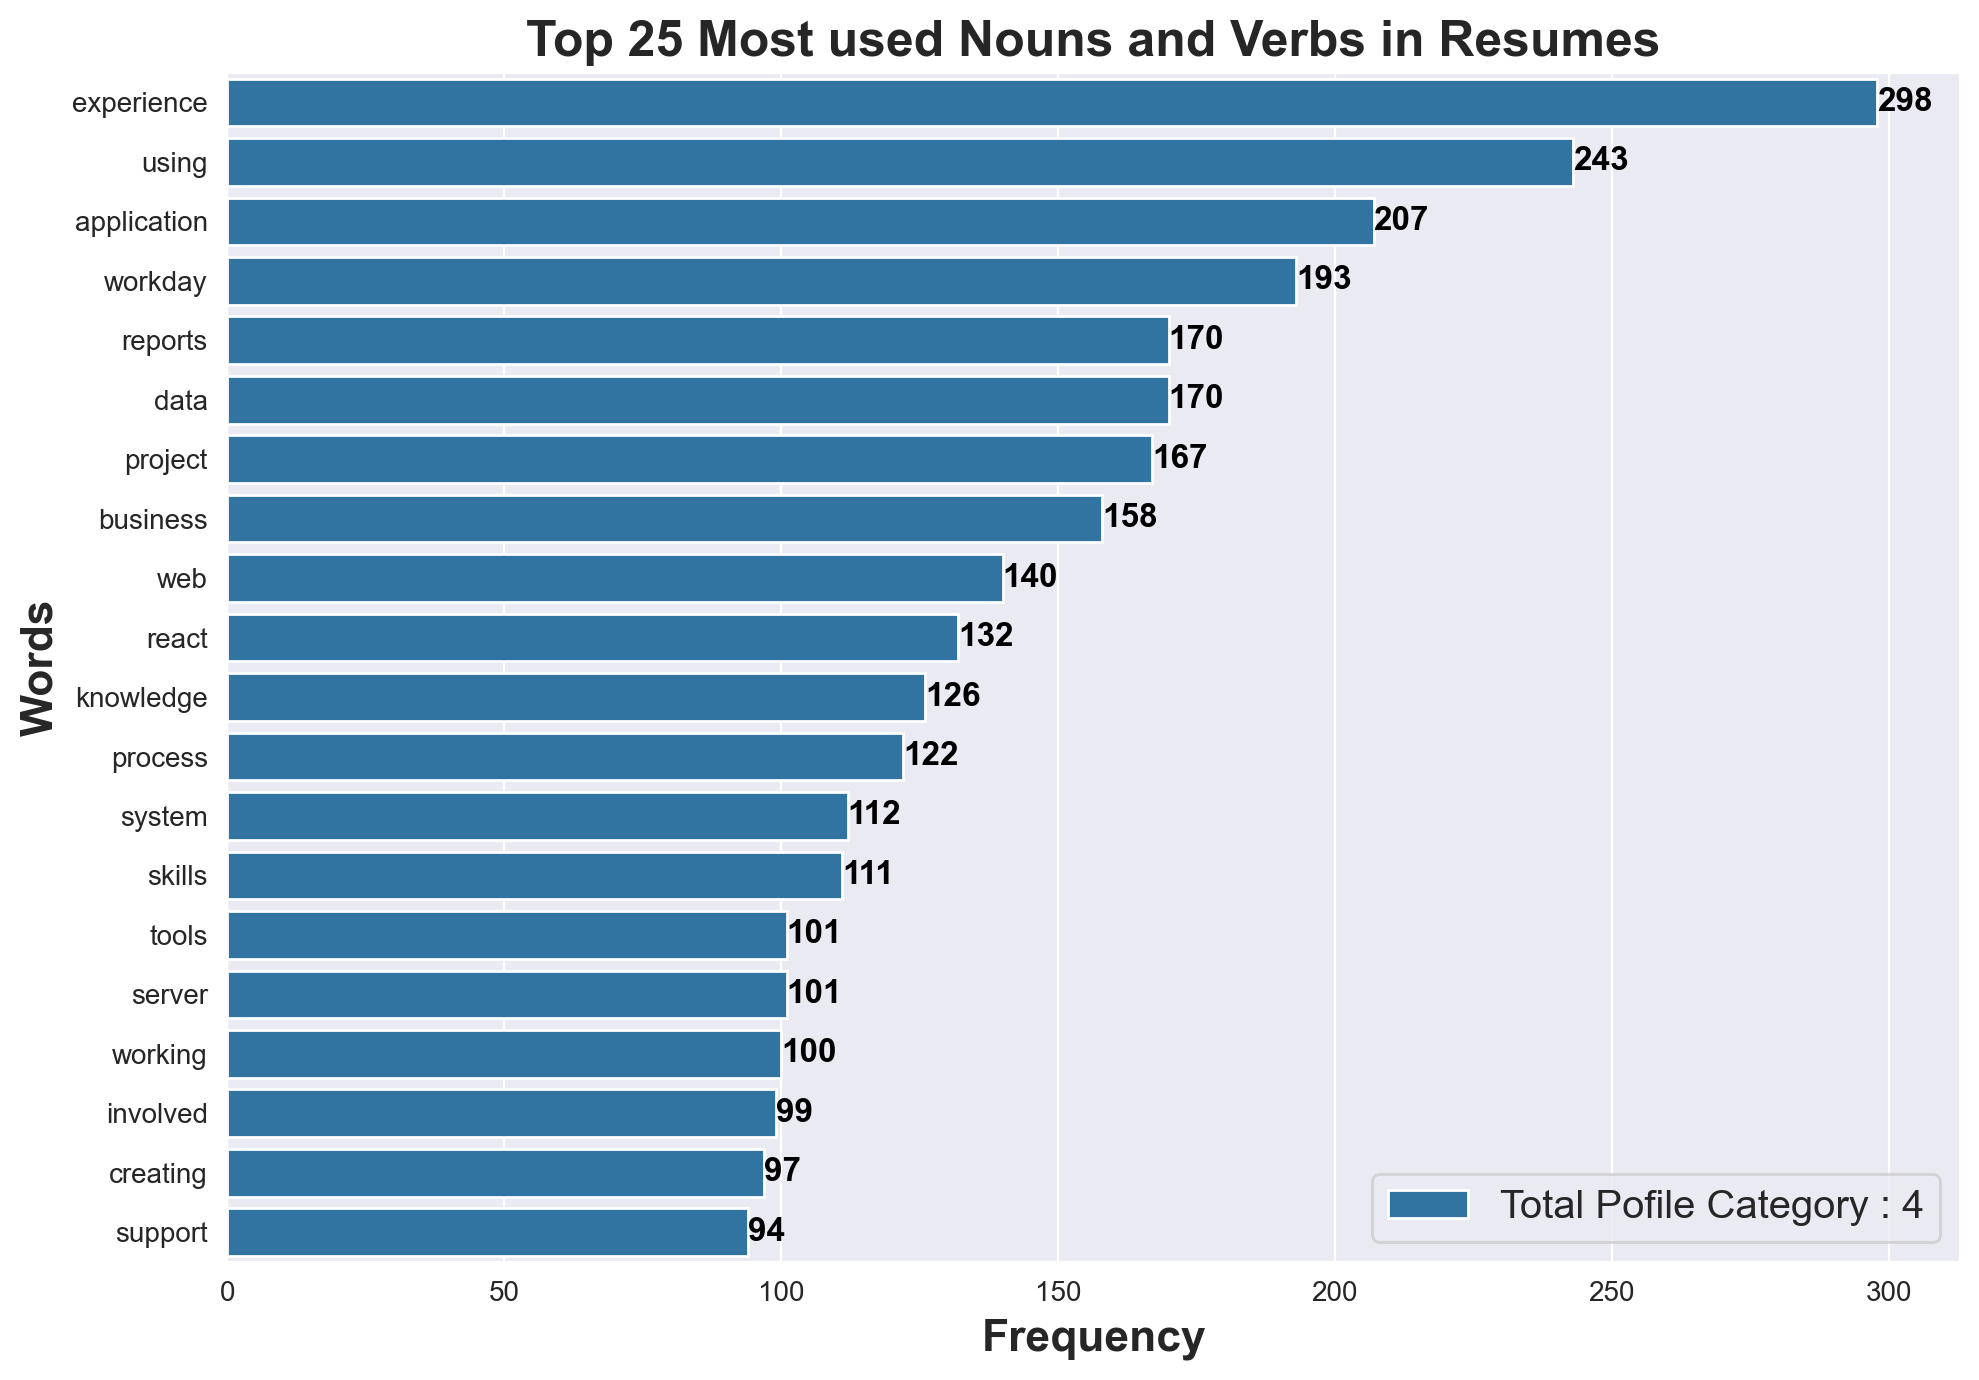

In [35]:
fig, axe = plt.subplots(1,1, figsize=(10,7), dpi=200)
ax = sns.barplot(x= wd_df['Count'].head(20), y= wd_df.Words.head(20), data= wd_df, ax = axe,
            label= 'Total Pofile Category : {}'.format(len(data.Category.unique())))

axe.set_xlabel('Frequency', size=16,fontweight= 'bold')
axe.set_ylabel('Words', size=16, fontweight= 'bold')
plt.xticks(rotation = 0)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Top 25 Most used Nouns and Verbs in Resumes', fontsize= 18, fontweight= 'bold')
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig(r'Top_Nouns_Verbs_Bar.png', dpi = 500)

# EDA MODEL 

In [36]:
data.head()

,Category1,Category2,Category3,Category4,Category,resume_details
0,Peoplesoft resumes,NaN,NaN,NaN,Peoplesoft resumes,anubhav kumar singh core competencies scriptin...
1,Peoplesoft resumes,NaN,NaN,NaN,Peoplesoft resumes,classification internal classification interna...
2,Peoplesoft resumes,NaN,NaN,NaN,Peoplesoft resumes,sirazuddin bangalore india sirazuddin bangalor...
3,Peoplesoft resumes,NaN,NaN,NaN,Peoplesoft resumes,peoplesoft admin varkala vikas career objectiv...
4,Peoplesoft resumes,NaN,NaN,NaN,Peoplesoft resumes,peoplesoft administration vivekanand sayana ca...


In [37]:

file_path = r'D:\Resumes'
file_name = []
profile = []

# Iterate through folders
for folder in os.listdir(file_path):
    folder_path = os.path.join(file_path, folder)
    
    # Check if it's a directory before proceeding
    if os.path.isdir(folder_path):
        for file in os.listdir(folder_path):
            if file.endswith(('.doc', '.docx')):  # Check for both extensions
                profile.append(folder)
                file_name.append(file)
            else:
                profile.append(folder)
                file_name.append(file)

#The code scans through each folder in D:\Resumes, checks the files inside each folder, and collects the file names and corresponding folder names.
#It stores the file names in file_name and the folder names in profile. The file names can include both .doc and .docx extensions.










In [38]:
data = pd.DataFrame()
data['Profile'] = profile
data['Resumes'] = file_name
data

,Profile,Resumes
0,Peoplesoft resumes,Peoplesoft Admin_AnubhavSingh.docx
1,Peoplesoft resumes,Peoplesoft Admin_G Ananda Rayudu.doc
2,Peoplesoft resumes,Peoplesoft Admin_Gangareddy.doc
3,Peoplesoft resumes,Peoplesoft Admin_Murali.docx
4,Peoplesoft resumes,Peoplesoft Admin_Priyanka Ramadoss.doc
...,...,...
74,workday resumes,Sri Krishna S_Hexaware.doc
75,workday resumes,Srikanth-Hexaware.docx
76,workday resumes,SSKumar_Hexaware.docx
77,workday resumes,Venkateswarlu B_Hexaware.doc


In [39]:
data.Profile.value_counts().index

Index(['React Developer', 'workday resumes', 'Peoplesoft resumes',
       'SQL Developer Lightning insight'],
      dtype='object')

In [40]:
data.Profile.value_counts()

React Developer                    24
workday resumes                    21
Peoplesoft resumes                 20
SQL Developer Lightning insight    14
Name: Profile, dtype: int64

In [41]:
data.duplicated().sum()

0

In [42]:
data.drop_duplicates(inplace=True)

### Number of Total Resumes

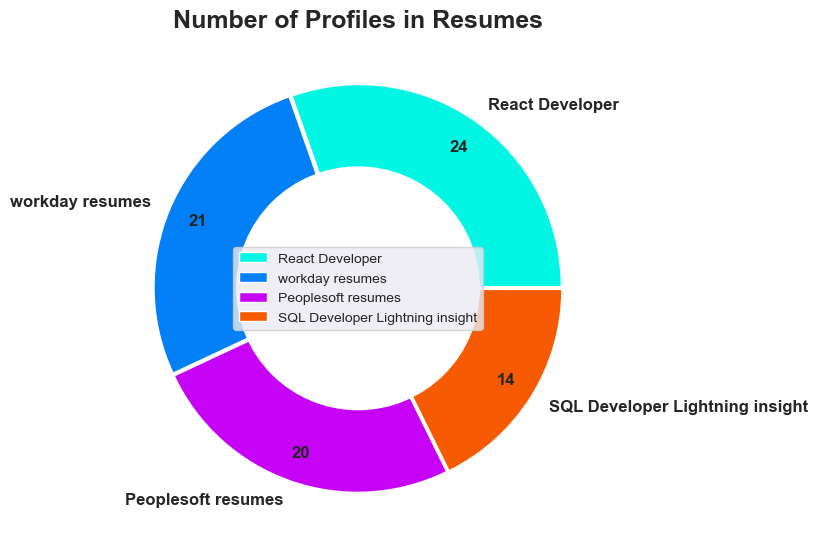

In [43]:
fig = plt.figure(figsize=(8,8))

sizes = data.Profile.value_counts()
labels = data.Profile.value_counts().index
colors = ['#03F6E4', '#0380F6', '#C603F6', '#F65B03'] #, '#4dc0b5', '#03F6E4', '#0380F6', '#C603F6', '#E8C110'
explode = (0.01, 0.01, 0.01, 0.01)

plt.pie(sizes, colors= colors, labels= labels, autopct= lambda x:'{:.0f}'.format(x*sizes.sum()/100),
        pctdistance= 0.85, explode= explode, startangle=0, textprops= {'size':'large', 'fontweight':'bold'})

centre_circle = plt.Circle((0,0), 0.60, fc='white')
fig.gca().add_artist(centre_circle)
plt.title('Number of Profiles in Resumes', fontsize= 18, fontweight= 'bold')
plt.legend(labels, loc="center")

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('No_Resume_Pai.png', dpi = 500)

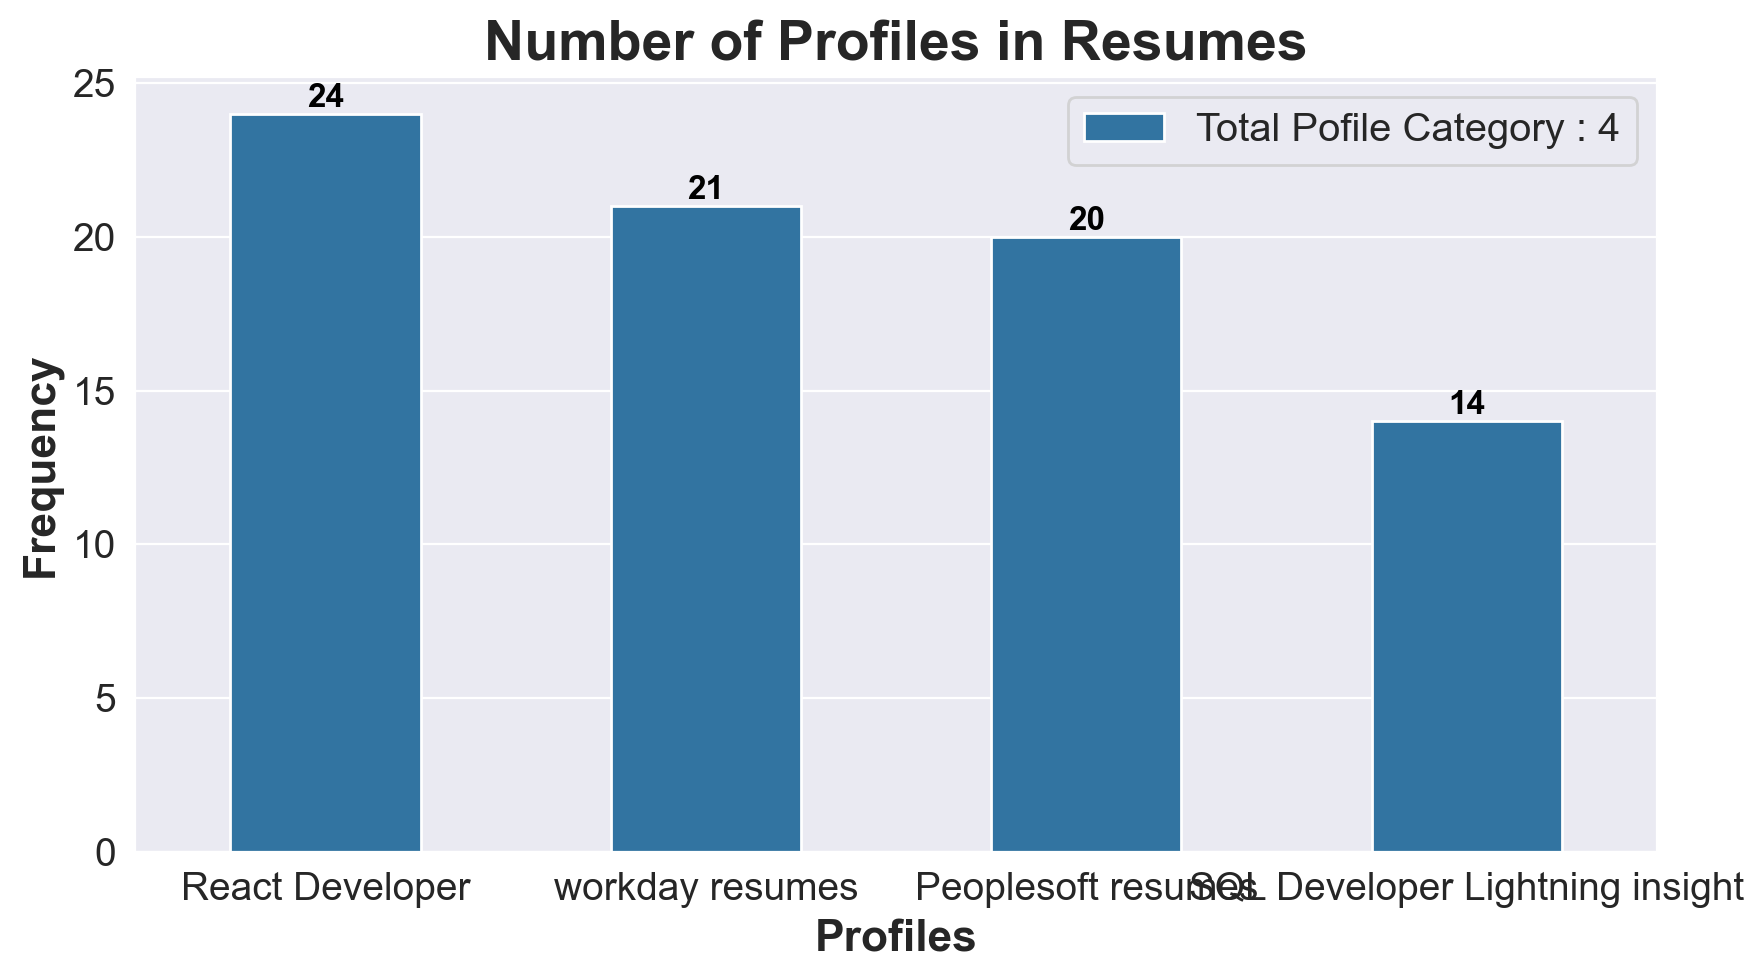

In [44]:
fig, axe = plt.subplots(1,1, figsize=(9,5), dpi=200)
ax = sns.barplot(x= data.Profile.value_counts().index, y= data.Profile.value_counts(), width=0.5, ax= axe, label= 'Total Pofile Category : {}'.format(len(data.Profile.unique())))

axe.set_xlabel('Profiles', size=16,fontweight = 'bold')
axe.set_ylabel('Frequency', size=16,fontweight = 'bold')
plt.xticks(rotation = 0)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Number of Profiles in Resumes', fontsize= 20, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)
    
pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('No_Resume_Bar', dpi = 500)

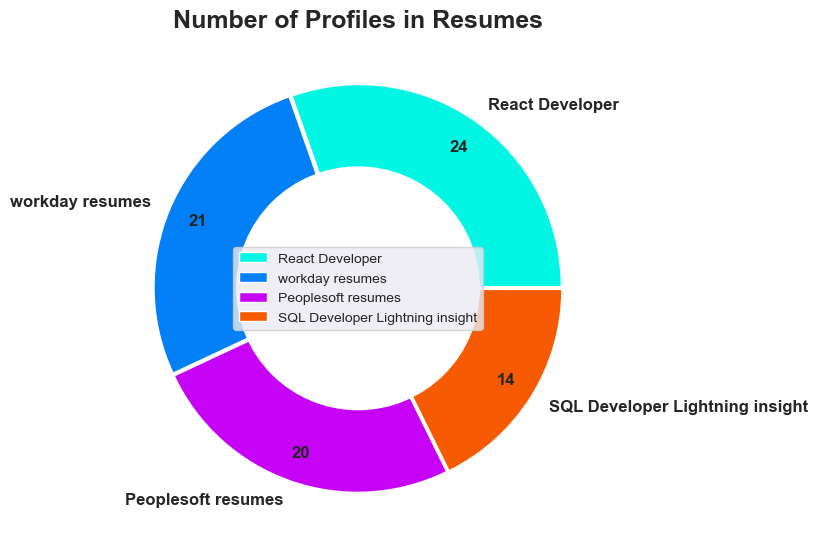

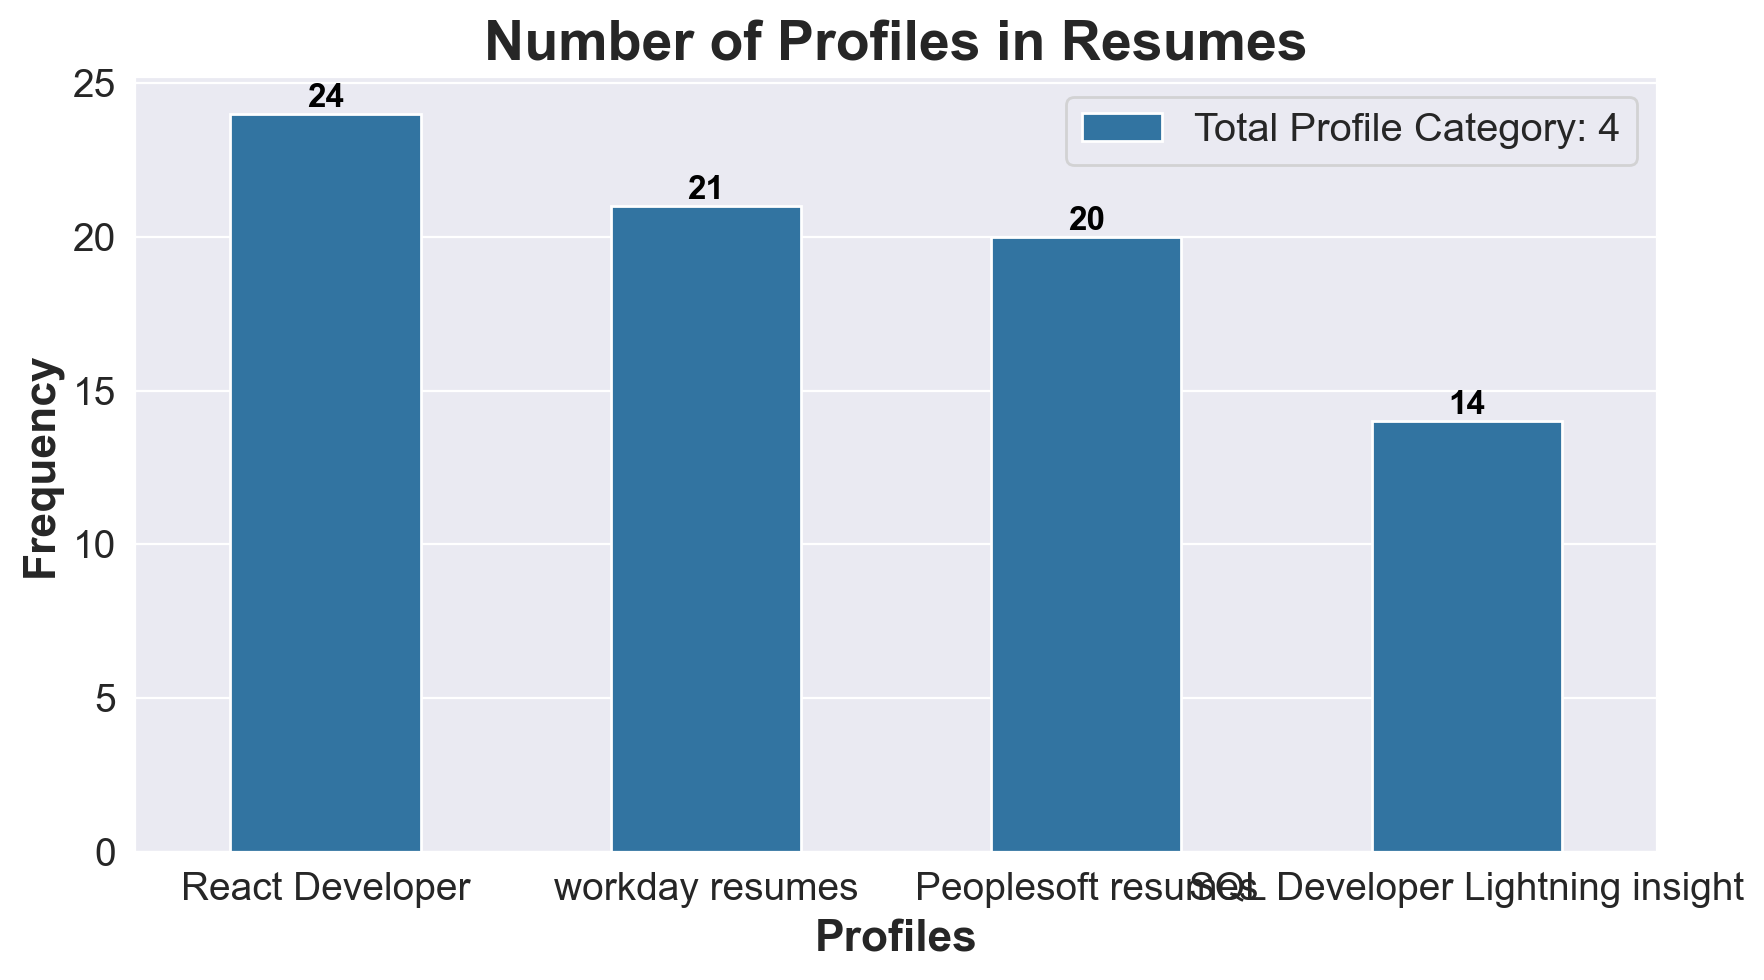

In [45]:
# Pie chart plot
fig = plt.figure(figsize=(8,8))

sizes = data['Profile'].value_counts()  # Update the column name
labels = data['Profile'].value_counts().index  # Update the column name
colors = ['#03F6E4', '#0380F6', '#C603F6', '#F65B03']
explode = (0.01, 0.01, 0.01, 0.01)

plt.pie(sizes, colors=colors, labels=labels, autopct=lambda x: '{:.0f}'.format(x * sizes.sum() / 100),
        pctdistance=0.85, explode=explode, startangle=0, textprops={'size': 'large', 'fontweight': 'bold'})

# Adding a white circle in the center for the donut effect
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig.gca().add_artist(centre_circle)

plt.title('Number of Profiles in Resumes', fontsize=18, fontweight='bold')
plt.legend(labels, loc="center")

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('No_Resume_Pie.png', dpi=500)

# Bar chart plot
fig, axe = plt.subplots(1, 1, figsize=(9, 5), dpi=200)

# Update the column name 'profile'
ax = sns.barplot(x=data['Profile'].value_counts().index, y=data['Profile'].value_counts(),
                 width=0.5, ax=axe, label='Total Profile Category: {}'.format(len(data['Profile'].unique())))

axe.set_xlabel('Profiles', size=16, fontweight='bold')
axe.set_ylabel('Frequency', size=16, fontweight='bold')
plt.xticks(rotation=0)
plt.legend(loc='best', fontsize='x-large')
plt.title('Number of Profiles in Resumes', fontsize=20, fontweight='bold')

for i in ax.containers:
    ax.bar_label(i, color='black', fontweight='bold', fontsize=12)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('No_Resume_Bar.png', dpi=500)


In [46]:
print(data.columns)

Index(['Profile', 'Resumes'], dtype='object')


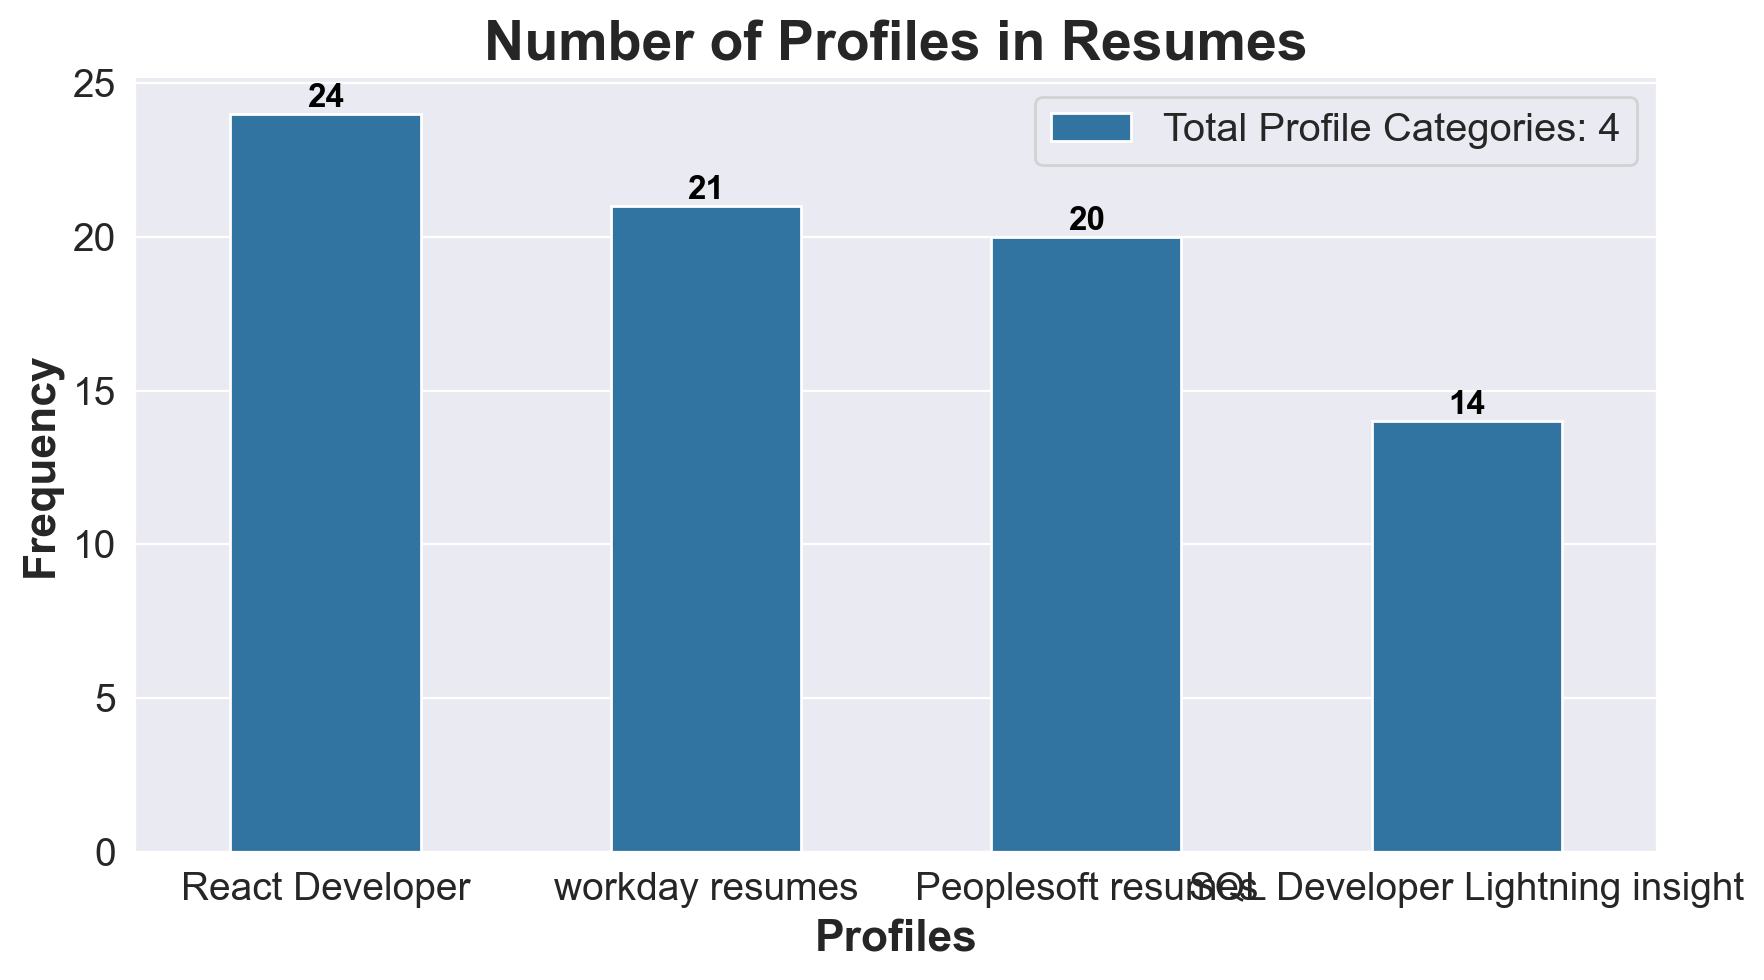

In [47]:
fig, axe = plt.subplots(1,1, figsize=(9,5), dpi=200)
ax = sns.barplot(x= data.Profile.value_counts().index, 
                 y= data.Profile.value_counts(), 
                 width=0.5, 
                 ax= axe, 
                 label= 'Total Profile Categories: {}'.format(len(data.Profile.unique())))

axe.set_xlabel('Profiles', size=16, fontweight='bold')
axe.set_ylabel('Frequency', size=16, fontweight='bold')
plt.xticks(rotation=0)
plt.legend(loc='best', fontsize='x-large')
plt.title('Number of Profiles in Resumes', fontsize=20, fontweight='bold')

for i in ax.containers:
    ax.bar_label(i, color='black', fontweight='bold', fontsize=12)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('No_Resume_Bar', dpi=500)


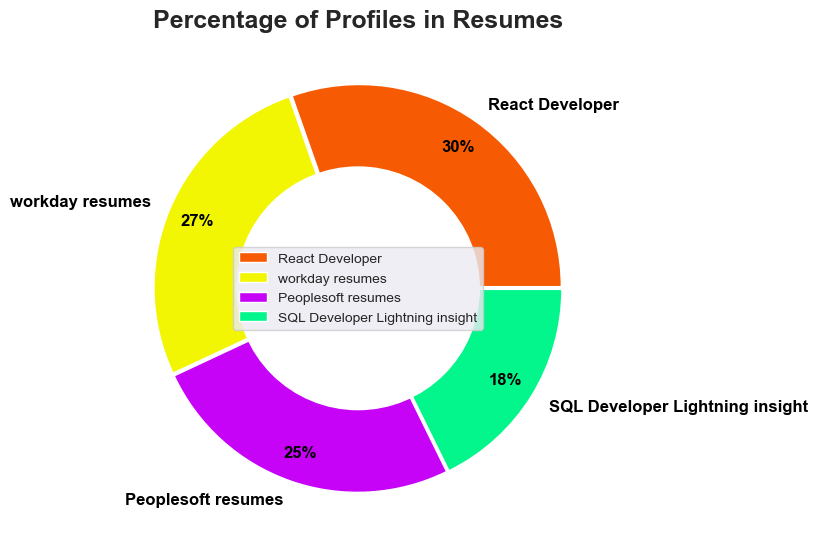

In [48]:
fig = plt.figure(figsize=(8,8),dpi=100) 

sizes = data.Profile.value_counts()
labels = data.Profile.value_counts().index
colors = ['#F65B03', '#F2F603', '#C603F6', '#03F68B']
explode = (0.01, 0.01, 0.01, 0.01)

plt.pie(sizes, colors= colors, labels= labels, autopct= '%1.0f%%', pctdistance=0.85, explode= explode, 
        startangle= 0, textprops= {'size':'large', 'fontweight':'bold', 'color':'black'})

centre_circle = plt.Circle((0,0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Percentage of Profiles in Resumes', fontsize= 18, fontweight= 'bold')
plt.legend(labels, loc="center")

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('Per_Cat_Pai', dpi = 500)


### Reading a Resume File

In [49]:
data=pd.DataFrame()

data['Resumes'] = file_name
data

,Resumes
0,Peoplesoft Admin_AnubhavSingh.docx
1,Peoplesoft Admin_G Ananda Rayudu.doc
2,Peoplesoft Admin_Gangareddy.doc
3,Peoplesoft Admin_Murali.docx
4,Peoplesoft Admin_Priyanka Ramadoss.doc
...,...
74,Sri Krishna S_Hexaware.doc
75,Srikanth-Hexaware.docx
76,SSKumar_Hexaware.docx
77,Venkateswarlu B_Hexaware.doc


In [50]:
import docx2txt

def extract_text_from_docx(docx_path):
    txt = docx2txt.process(docx_path)
    if txt:
        return txt.replace('\t', ' ')
    return None
 
print(extract_text_from_docx(r'D:\Resumes\Peoplesoft resumes\Peoplesoft Admin_Murali.docx'))

Classification: Internal

Classification: Internal



  Murali



  Experience Summary 

  

I have 6 years of experience working in PeopleSoft Administration and performing various infrastructure related activities in PeopleSoft environments. 



Installed and configured PeopleSoft 9.0,9.1,9.2 Web server, Application server, Database server and Process scheduler 

server on Windows, UNIX and Linux platforms.

Creating Domains for Web server, Application server and Process scheduler server.

Applied Patches Manually and applied Maintenance Packs through Change Assistant tool.

Experience in DPKs installations.

Applying TAX UPDATES and fixes using PUM

Migrating projects from one environment to another environment using Application Designer and also through CAPI, STAT tools.

Performed Single sign on (SSO)Implementation.

Experience in running Compare Reports between pre and Post Migrations.

Experience in setting up Client Workstation for Developers and Testers.

Involved in Configura

### Data Exploration

In [51]:
data = pd.read_csv(r'Cleaned_Resumes.csv')
data.head()

,Category1,Category2,Category3,Category4,Category,resume_details
0,Peoplesoft resumes,NaN,NaN,NaN,Peoplesoft resumes,anubhav kumar singh core competencies scriptin...
1,Peoplesoft resumes,NaN,NaN,NaN,Peoplesoft resumes,classification internal classification interna...
2,Peoplesoft resumes,NaN,NaN,NaN,Peoplesoft resumes,sirazuddin bangalore india sirazuddin bangalor...
3,Peoplesoft resumes,NaN,NaN,NaN,Peoplesoft resumes,peoplesoft admin varkala vikas career objectiv...
4,Peoplesoft resumes,NaN,NaN,NaN,Peoplesoft resumes,peoplesoft administration vivekanand sayana ca...


### N-grams
#### N-grams analyses are often used to see which words often show up together

In [52]:
TextBlob(data['resume_details'][1]).ngrams(2)[:20]

[WordList(['classification', 'internal']),
 WordList(['internal', 'classification']),
 WordList(['classification', 'internal']),
 WordList(['internal', 'murali']),
 WordList(['murali', 'experience']),
 WordList(['experience', 'summary']),
 WordList(['summary', 'years']),
 WordList(['years', 'experience']),
 WordList(['experience', 'working']),
 WordList(['working', 'peoplesoft']),
 WordList(['peoplesoft', 'administration']),
 WordList(['administration', 'performing']),
 WordList(['performing', 'various']),
 WordList(['various', 'infrastructure']),
 WordList(['infrastructure', 'related']),
 WordList(['related', 'activities']),
 WordList(['activities', 'peoplesoft']),
 WordList(['peoplesoft', 'environments']),
 WordList(['environments', 'installed']),
 WordList(['installed', 'configured'])]

In [53]:
TextBlob(data['resume_details'][1]).ngrams(3)[:20]

[WordList(['classification', 'internal', 'classification']),
 WordList(['internal', 'classification', 'internal']),
 WordList(['classification', 'internal', 'murali']),
 WordList(['internal', 'murali', 'experience']),
 WordList(['murali', 'experience', 'summary']),
 WordList(['experience', 'summary', 'years']),
 WordList(['summary', 'years', 'experience']),
 WordList(['years', 'experience', 'working']),
 WordList(['experience', 'working', 'peoplesoft']),
 WordList(['working', 'peoplesoft', 'administration']),
 WordList(['peoplesoft', 'administration', 'performing']),
 WordList(['administration', 'performing', 'various']),
 WordList(['performing', 'various', 'infrastructure']),
 WordList(['various', 'infrastructure', 'related']),
 WordList(['infrastructure', 'related', 'activities']),
 WordList(['related', 'activities', 'peoplesoft']),
 WordList(['activities', 'peoplesoft', 'environments']),
 WordList(['peoplesoft', 'environments', 'installed']),
 WordList(['environments', 'installed', 

In [54]:
data['resume_details']

0     anubhav kumar singh core competencies scriptin...
1     classification internal classification interna...
2     sirazuddin bangalore india sirazuddin bangalor...
3     peoplesoft admin varkala vikas career objectiv...
4     peoplesoft administration vivekanand sayana ca...
5     hari narayana professional summary years exper...
6     murali professional summary years experience p...
7     priyabrata hota career objective pursuing peop...
8     tanna sujatha objective seeking challenging ro...
9     address manyata tech park nagavara bangalore l...
10    name ravali curriculum vitae specialization co...
11    susovan bag seeking challenging position field...
12    kanumuru deepak reddy career objective secure ...
13    haripriya battina experience developer reactjs...
14    kamalakar reddy linked professional summary ye...
15    naveen sadhu title software developer location...
16    pragnya pattnaik expertise around years experi...
17    sarala madasu sarala madasu sri geethika p

### Top 20 most used words in Resumes

In [55]:
countvec = CountVectorizer(stop_words=stopwords.words('english'), ngram_range=(1,2))
ngrams = countvec.fit_transform(data['resume_details']) # matrix of ngrams
count_values = ngrams.toarray().sum(axis=0) # count frequency of ngrams

vocab = countvec.vocabulary_ # list of ngrams
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k, i in vocab.items()],
                               reverse=True)).rename(columns={0: 'Frequency', 1:'Unigram_Bigram'})

In [56]:
df_ngram.head(20)

,Frequency,Unigram_Bigram
0,330,experience
1,253,using
2,232,workday
3,213,sql
4,208,application
5,188,server
6,183,project
7,180,data
8,170,reports
9,169,peoplesoft


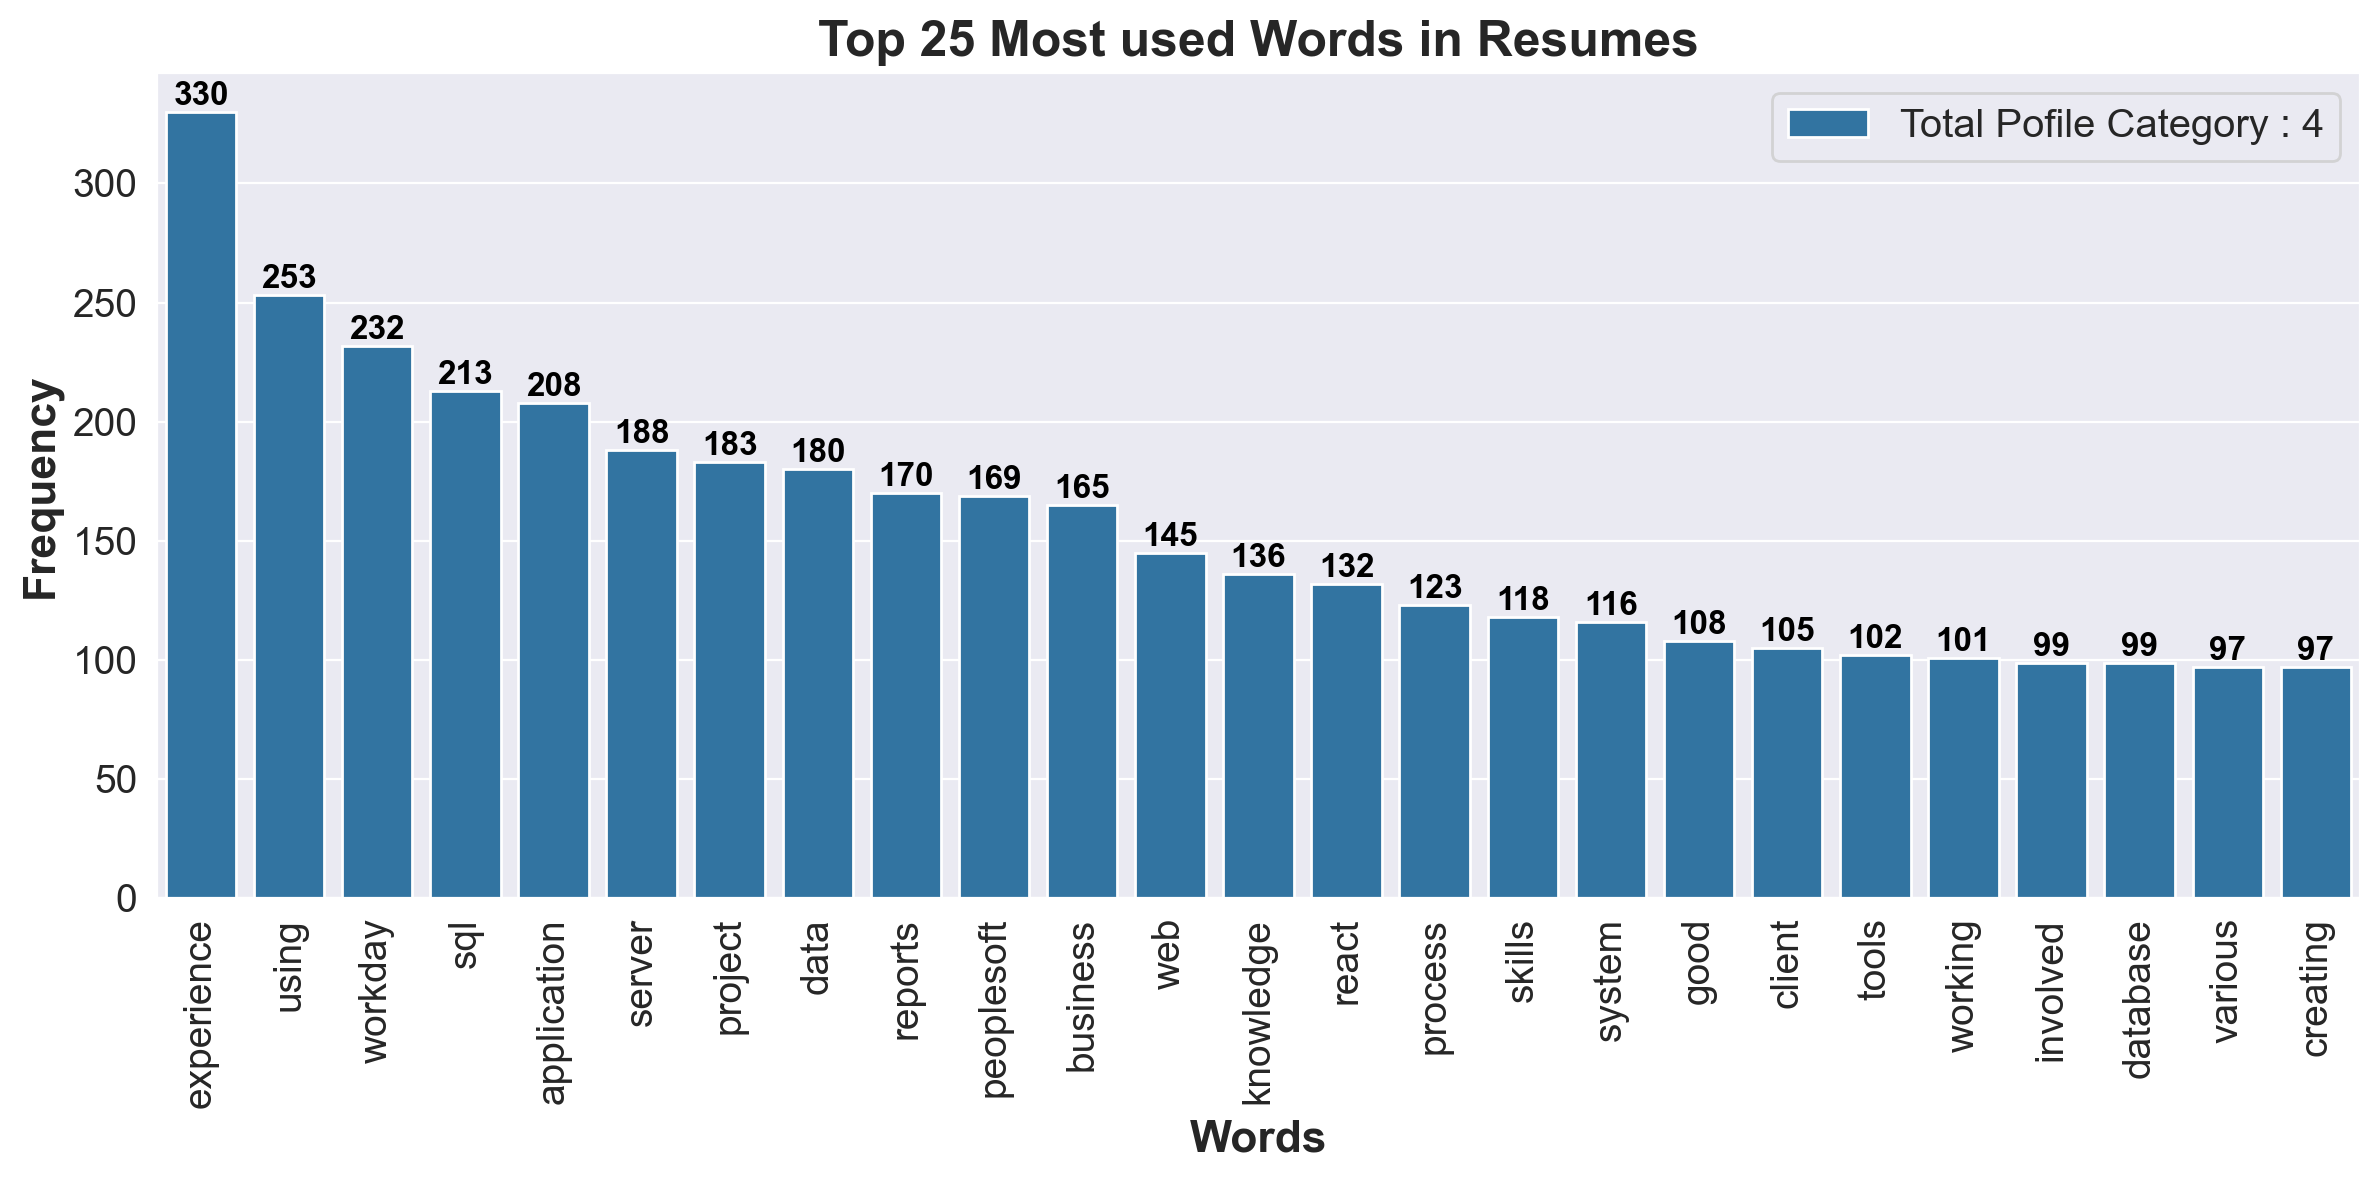

In [57]:
fig, axe = plt.subplots(1,1, figsize=(12,6), dpi=200)
ax = sns.barplot(x=df_ngram['Unigram_Bigram'].head(25), y=df_ngram.Frequency.head(25), data=data, ax = axe,
            label='Total Pofile Category : {}'.format(len(data.Category.unique())))

axe.set_xlabel('Words', size=16,fontweight= 'bold')
axe.set_ylabel('Frequency', size=16, fontweight= 'bold')
plt.xticks(rotation = 90)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Top 25 Most used Words in Resumes', fontsize= 18, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('Top_Words_Bar', dpi = 500)

# Model Building

In [58]:
data = pd.read_csv('Cleaned_Resumes.csv')
data.head()

,Category1,Category2,Category3,Category4,Category,resume_details
0,Peoplesoft resumes,NaN,NaN,NaN,Peoplesoft resumes,anubhav kumar singh core competencies scriptin...
1,Peoplesoft resumes,NaN,NaN,NaN,Peoplesoft resumes,classification internal classification interna...
2,Peoplesoft resumes,NaN,NaN,NaN,Peoplesoft resumes,sirazuddin bangalore india sirazuddin bangalor...
3,Peoplesoft resumes,NaN,NaN,NaN,Peoplesoft resumes,peoplesoft admin varkala vikas career objectiv...
4,Peoplesoft resumes,NaN,NaN,NaN,Peoplesoft resumes,peoplesoft administration vivekanand sayana ca...


In [59]:
data=data[['Category','resume_details']]

In [60]:
data.head()

,Category,resume_details
0,Peoplesoft resumes,anubhav kumar singh core competencies scriptin...
1,Peoplesoft resumes,classification internal classification interna...
2,Peoplesoft resumes,sirazuddin bangalore india sirazuddin bangalor...
3,Peoplesoft resumes,peoplesoft admin varkala vikas career objectiv...
4,Peoplesoft resumes,peoplesoft administration vivekanand sayana ca...


### Data Preprocessing

#### LabelEncoder

In [61]:
from sklearn.preprocessing import LabelEncoder
Encoder=LabelEncoder()
data["LebelEncoding"]=Encoder.fit_transform(data ["Category"])

In [62]:
data.head()

,Category,resume_details,LebelEncoding
0,Peoplesoft resumes,anubhav kumar singh core competencies scriptin...,0
1,Peoplesoft resumes,classification internal classification interna...,0
2,Peoplesoft resumes,sirazuddin bangalore india sirazuddin bangalor...,0
3,Peoplesoft resumes,peoplesoft admin varkala vikas career objectiv...,0
4,Peoplesoft resumes,peoplesoft administration vivekanand sayana ca...,0


In [63]:
data.describe()

,LebelEncoding
count,52.000000
mean,1.442308
std,1.036840
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,3.000000


In [64]:
data.isnull().sum()

Category          0
resume_details    0
LebelEncoding     0
dtype: int64

### Model Building

### Train - Test Split

In [65]:
x =data['resume_details'].values
y =data['Category'].values

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=45, test_size=0.25,stratify=y)
x_train.shape, x_test.shape

((39,), (13,))

###  TF-IDF Vectorization

In [67]:
tfidf_vector = TfidfVectorizer(sublinear_tf=True,stop_words='english')

In [68]:
x_train = tfidf_vector.fit_transform(x_train)
x_test = tfidf_vector.transform(x_test)

In [69]:
x_train.shape, x_test.shape

((39, 2721), (13, 2721))

In [70]:
print(y_train),print(y_test)

['Reactjs' 'workday resumes' 'SQL Developer Lightning insight'
 'Peoplesoft resumes' 'Reactjs' 'Peoplesoft resumes'
 'SQL Developer Lightning insight' 'Peoplesoft resumes' 'Reactjs'
 'Peoplesoft resumes' 'Reactjs' 'Peoplesoft resumes' 'Reactjs' 'Reactjs'
 'workday resumes' 'SQL Developer Lightning insight'
 'SQL Developer Lightning insight' 'Reactjs' 'Reactjs' 'Reactjs' 'Reactjs'
 'Peoplesoft resumes' 'Reactjs' 'Reactjs' 'Peoplesoft resumes'
 'SQL Developer Lightning insight' 'SQL Developer Lightning insight'
 'workday resumes' 'workday resumes' 'workday resumes'
 'SQL Developer Lightning insight' 'Reactjs' 'workday resumes'
 'Peoplesoft resumes' 'workday resumes' 'Reactjs' 'Reactjs'
 'workday resumes' 'SQL Developer Lightning insight']
['Peoplesoft resumes' 'Reactjs' 'Peoplesoft resumes' 'workday resumes'
 'Reactjs' 'SQL Developer Lightning insight' 'Reactjs' 'workday resumes'
 'SQL Developer Lightning insight' 'workday resumes' 'Reactjs' 'Reactjs'
 'SQL Developer Lightning insight']


(None, None)

### Classification Models

#### KNN Classifier

In [71]:
model_knn = KNeighborsClassifier(n_neighbors=7)
model_knn.fit(x_train, y_train)
y_pred = model_knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_knn.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_knn.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_knn,classification_report(y_test, y_pred)))
nb_score = model_knn.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_knn = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_knn = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_knn = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_knn = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.95
Accuracy of  test set    : 1.00
Classification report for classifier KNeighborsClassifier(n_neighbors=7):
                                 precision    recall  f1-score   support

             Peoplesoft resumes       1.00      1.00      1.00         2
                        Reactjs       1.00      1.00      1.00         5
SQL Developer Lightning insight       1.00      1.00      1.00         3
                workday resumes       1.00      1.00      1.00         3

                       accuracy                           1.00        13
                      macro avg       1.00      1.00      1.00        13
                   weighted avg       1.00      1.00      1.00        13




### Decision Tree Classifier

In [72]:
model_DT = DecisionTreeClassifier(criterion='gini')
model_DT.fit(x_train, y_train)
y_pred = model_DT.predict(x_test)
accuracy_DT = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_DT.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_DT.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_DT,classification_report(y_test, y_pred)))
nb_score = model_DT.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_DT = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_DT= round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_DT = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_DT = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.85
Classification report for classifier DecisionTreeClassifier():
                                 precision    recall  f1-score   support

             Peoplesoft resumes       1.00      1.00      1.00         2
                        Reactjs       1.00      0.80      0.89         5
SQL Developer Lightning insight       0.67      0.67      0.67         3
                workday resumes       0.75      1.00      0.86         3

                       accuracy                           0.85        13
                      macro avg       0.85      0.87      0.85        13
                   weighted avg       0.87      0.85      0.85        13




###  Random Forest Classifier

In [73]:
model_RF = RandomForestClassifier(n_estimators=200)
model_RF.fit(x_train, y_train)
y_pred = model_RF.predict(x_test)
accuracy_RF = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_RF.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_RF.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_RF,classification_report(y_test, y_pred)))
nb_score = model_RF.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)


precision_RF = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_RF = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_RF = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_RF = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier RandomForestClassifier(n_estimators=200):
                                 precision    recall  f1-score   support

             Peoplesoft resumes       1.00      1.00      1.00         2
                        Reactjs       1.00      1.00      1.00         5
SQL Developer Lightning insight       1.00      1.00      1.00         3
                workday resumes       1.00      1.00      1.00         3

                       accuracy                           1.00        13
                      macro avg       1.00      1.00      1.00        13
                   weighted avg       1.00      1.00      1.00        13




### Support Vectore Machine (SVM) Classifier

In [74]:
model_svm = SVC()
model_svm.fit(x_train, y_train)
y_pred = model_svm.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_svm.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_svm.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_svm,classification_report(y_test, y_pred)))
nb_score = model_svm.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_svm = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_svm = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_svm = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_svm = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.92
Classification report for classifier SVC():
                                 precision    recall  f1-score   support

             Peoplesoft resumes       1.00      1.00      1.00         2
                        Reactjs       0.83      1.00      0.91         5
SQL Developer Lightning insight       1.00      0.67      0.80         3
                workday resumes       1.00      1.00      1.00         3

                       accuracy                           0.92        13
                      macro avg       0.96      0.92      0.93        13
                   weighted avg       0.94      0.92      0.92        13




### Logistic Regression

In [75]:
model_lgr = LogisticRegression()
model_lgr.fit(x_train, y_train)
y_pred = model_lgr.predict(x_test)
accuracy_lgr = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_lgr.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_lgr.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_lgr,classification_report(y_test, y_pred)))
nb_score = model_lgr.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)


precision_lgr = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_lgr = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_lgr = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_lgr = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier LogisticRegression():
                                 precision    recall  f1-score   support

             Peoplesoft resumes       1.00      1.00      1.00         2
                        Reactjs       1.00      1.00      1.00         5
SQL Developer Lightning insight       1.00      1.00      1.00         3
                workday resumes       1.00      1.00      1.00         3

                       accuracy                           1.00        13
                      macro avg       1.00      1.00      1.00        13
                   weighted avg       1.00      1.00      1.00        13




### Bagging Classifier

In [76]:
model_bagg = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
model_bagg.fit(x_train, y_train)
y_pred = model_bagg.predict(x_test)
accuracy_bagg = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_bagg.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_bagg.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_bagg,classification_report(y_test, y_pred)))
nb_score = model_bagg.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_bagg = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_bagg = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_bagg = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_bagg = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier BaggingClassifier(base_estimator=KNeighborsClassifier(), max_features=0.5,
                  max_samples=0.5):
                                 precision    recall  f1-score   support

             Peoplesoft resumes       1.00      1.00      1.00         2
                        Reactjs       1.00      1.00      1.00         5
SQL Developer Lightning insight       1.00      1.00      1.00         3
                workday resumes       1.00      1.00      1.00         3

                       accuracy                           1.00        13
                      macro avg       1.00      1.00      1.00        13
                   weighted avg       1.00      1.00      1.00        13




### AdaBoost Classifier

In [77]:
model_Adaboost = AdaBoostClassifier(n_estimators=100)
model_Adaboost.fit(x_train, y_train)
y_pred = model_Adaboost.predict(x_test)
accuracy_Adaboost = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_Adaboost.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_Adaboost.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_Adaboost,classification_report(y_test, y_pred)))
nb_score = model_Adaboost.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_Adaboost = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_Adaboost = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_Adaboost = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_Adaboost = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier AdaBoostClassifier(n_estimators=100):
                                 precision    recall  f1-score   support

             Peoplesoft resumes       1.00      1.00      1.00         2
                        Reactjs       1.00      1.00      1.00         5
SQL Developer Lightning insight       1.00      1.00      1.00         3
                workday resumes       1.00      1.00      1.00         3

                       accuracy                           1.00        13
                      macro avg       1.00      1.00      1.00        13
                   weighted avg       1.00      1.00      1.00        13




###  Gradient Boosting Classifier

In [78]:
model_GradientBoost = GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=1, random_state=0)
model_GradientBoost.fit(x_train, y_train)
y_pred = model_GradientBoost.predict(x_test)
accuracy_GradientBoost = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_GradientBoost.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_GradientBoost.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_GradientBoost,classification_report(y_test, y_pred)))
nb_score = model_GradientBoost.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_Gradientboost = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_Gradientboost = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_Gradientboost = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_Gradientboost = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0):
                                 precision    recall  f1-score   support

             Peoplesoft resumes       1.00      1.00      1.00         2
                        Reactjs       1.00      1.00      1.00         5
SQL Developer Lightning insight       1.00      1.00      1.00         3
                workday resumes       1.00      1.00      1.00         3

                       accuracy                           1.00        13
                      macro avg       1.00      1.00      1.00        13
                   weighted avg       1.00      1.00      1.00        13




### Naive Bayes Classifier

In [79]:
model_NB =MultinomialNB(alpha=1, fit_prior=False, class_prior=None)
model_NB.fit(x_train, y_train)
y_pred = model_NB.predict(x_test)
accuracy_NB = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_NB.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_NB.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_NB,classification_report(y_test, y_pred)))
nb_score = model_NB.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_NB = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_NB = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_NB = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_NB = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier MultinomialNB(alpha=1, fit_prior=False):
                                 precision    recall  f1-score   support

             Peoplesoft resumes       1.00      1.00      1.00         2
                        Reactjs       1.00      1.00      1.00         5
SQL Developer Lightning insight       1.00      1.00      1.00         3
                workday resumes       1.00      1.00      1.00         3

                       accuracy                           1.00        13
                      macro avg       1.00      1.00      1.00        13
                   weighted avg       1.00      1.00      1.00        13




## Model Evaluation

In [80]:
Evaluation = {"Models":["KNN Classifier","DecisionTree Classifier","RandomForest Classifier","SVM Classifier",
                        "Logistic Regression","Bagging Classifier","AdaBoost Classifier","Gradient Boosting Classifier","Naive Bayes Classifier"],\
            "Train_Accuracy(%)":[model_knn.score(x_train, y_train),model_DT.score(x_train, y_train),model_RF.score(x_train, y_train),model_svm.score(x_train, y_train),model_lgr.score(x_train, y_train),
                                 model_bagg.score(x_train, y_train),model_Adaboost.score(x_train, y_train),model_GradientBoost.score(x_train, y_train), model_NB.score(x_train, y_train)],
            "Test_Accuracy(%)":[accuracy_knn,accuracy_DT,accuracy_RF,accuracy_svm,accuracy_lgr,accuracy_bagg,accuracy_Adaboost,accuracy_GradientBoost,accuracy_NB],\
            "Precision(%)":[precision_knn,precision_DT,precision_RF,precision_svm,precision_lgr,precision_bagg,precision_Adaboost,precision_Gradientboost,precision_NB],\
            "Recall(%)":[recall_knn,recall_DT,recall_RF,recall_svm,recall_lgr,recall_bagg,recall_Adaboost,recall_Gradientboost,recall_NB],\
            "F1-Score(%)":[f1_knn,f1_DT,f1_RF,f1_svm,f1_lgr,f1_bagg,f1_Adaboost,f1_Gradientboost,f1_NB]}
table = pd.DataFrame(Evaluation)
table

,Models,Train_Accuracy(%),Test_Accuracy(%),Precision(%),Recall(%),F1-Score(%)
0,KNN Classifier,0.948718,1.00,1.00,1.00,1.00
1,DecisionTree Classifier,1.000000,0.85,0.85,0.87,0.85
2,RandomForest Classifier,1.000000,1.00,1.00,1.00,1.00
3,SVM Classifier,1.000000,0.92,0.96,0.92,0.93
4,Logistic Regression,1.000000,1.00,1.00,1.00,1.00
5,Bagging Classifier,1.000000,1.00,1.00,1.00,1.00
6,AdaBoost Classifier,1.000000,1.00,1.00,1.00,1.00
7,Gradient Boosting Classifier,1.000000,1.00,1.00,1.00,1.00
8,Naive Bayes Classifier,1.000000,1.00,1.00,1.00,1.00


In [81]:
model_names = ["KNN","DecisionTree","RandomForest ","SVM ", "Logistic Regression",
               "Bagging","AdaBoost","Gradient Boosting ","Naive Bayes"]
Test_accuracies = [accuracy_knn*100,accuracy_DT*100,accuracy_RF*100,
              accuracy_svm*100,accuracy_lgr*100,accuracy_bagg*100,
              accuracy_Adaboost*100,accuracy_GradientBoost*100,accuracy_NB*100]
Train_accuracies=[model_knn.score(x_train, y_train)*100,model_DT.score(x_train, y_train)*100,
                  model_RF.score(x_train, y_train)*100,model_svm.score(x_train, y_train)*100,
                  model_lgr.score(x_train, y_train)*100,model_bagg.score(x_train, y_train)*100,
                  model_Adaboost.score(x_train, y_train)*100,model_GradientBoost.score(x_train, y_train)*100,
                  model_NB.score(x_train, y_train)*100]

### Train and Test Accuracy Plot

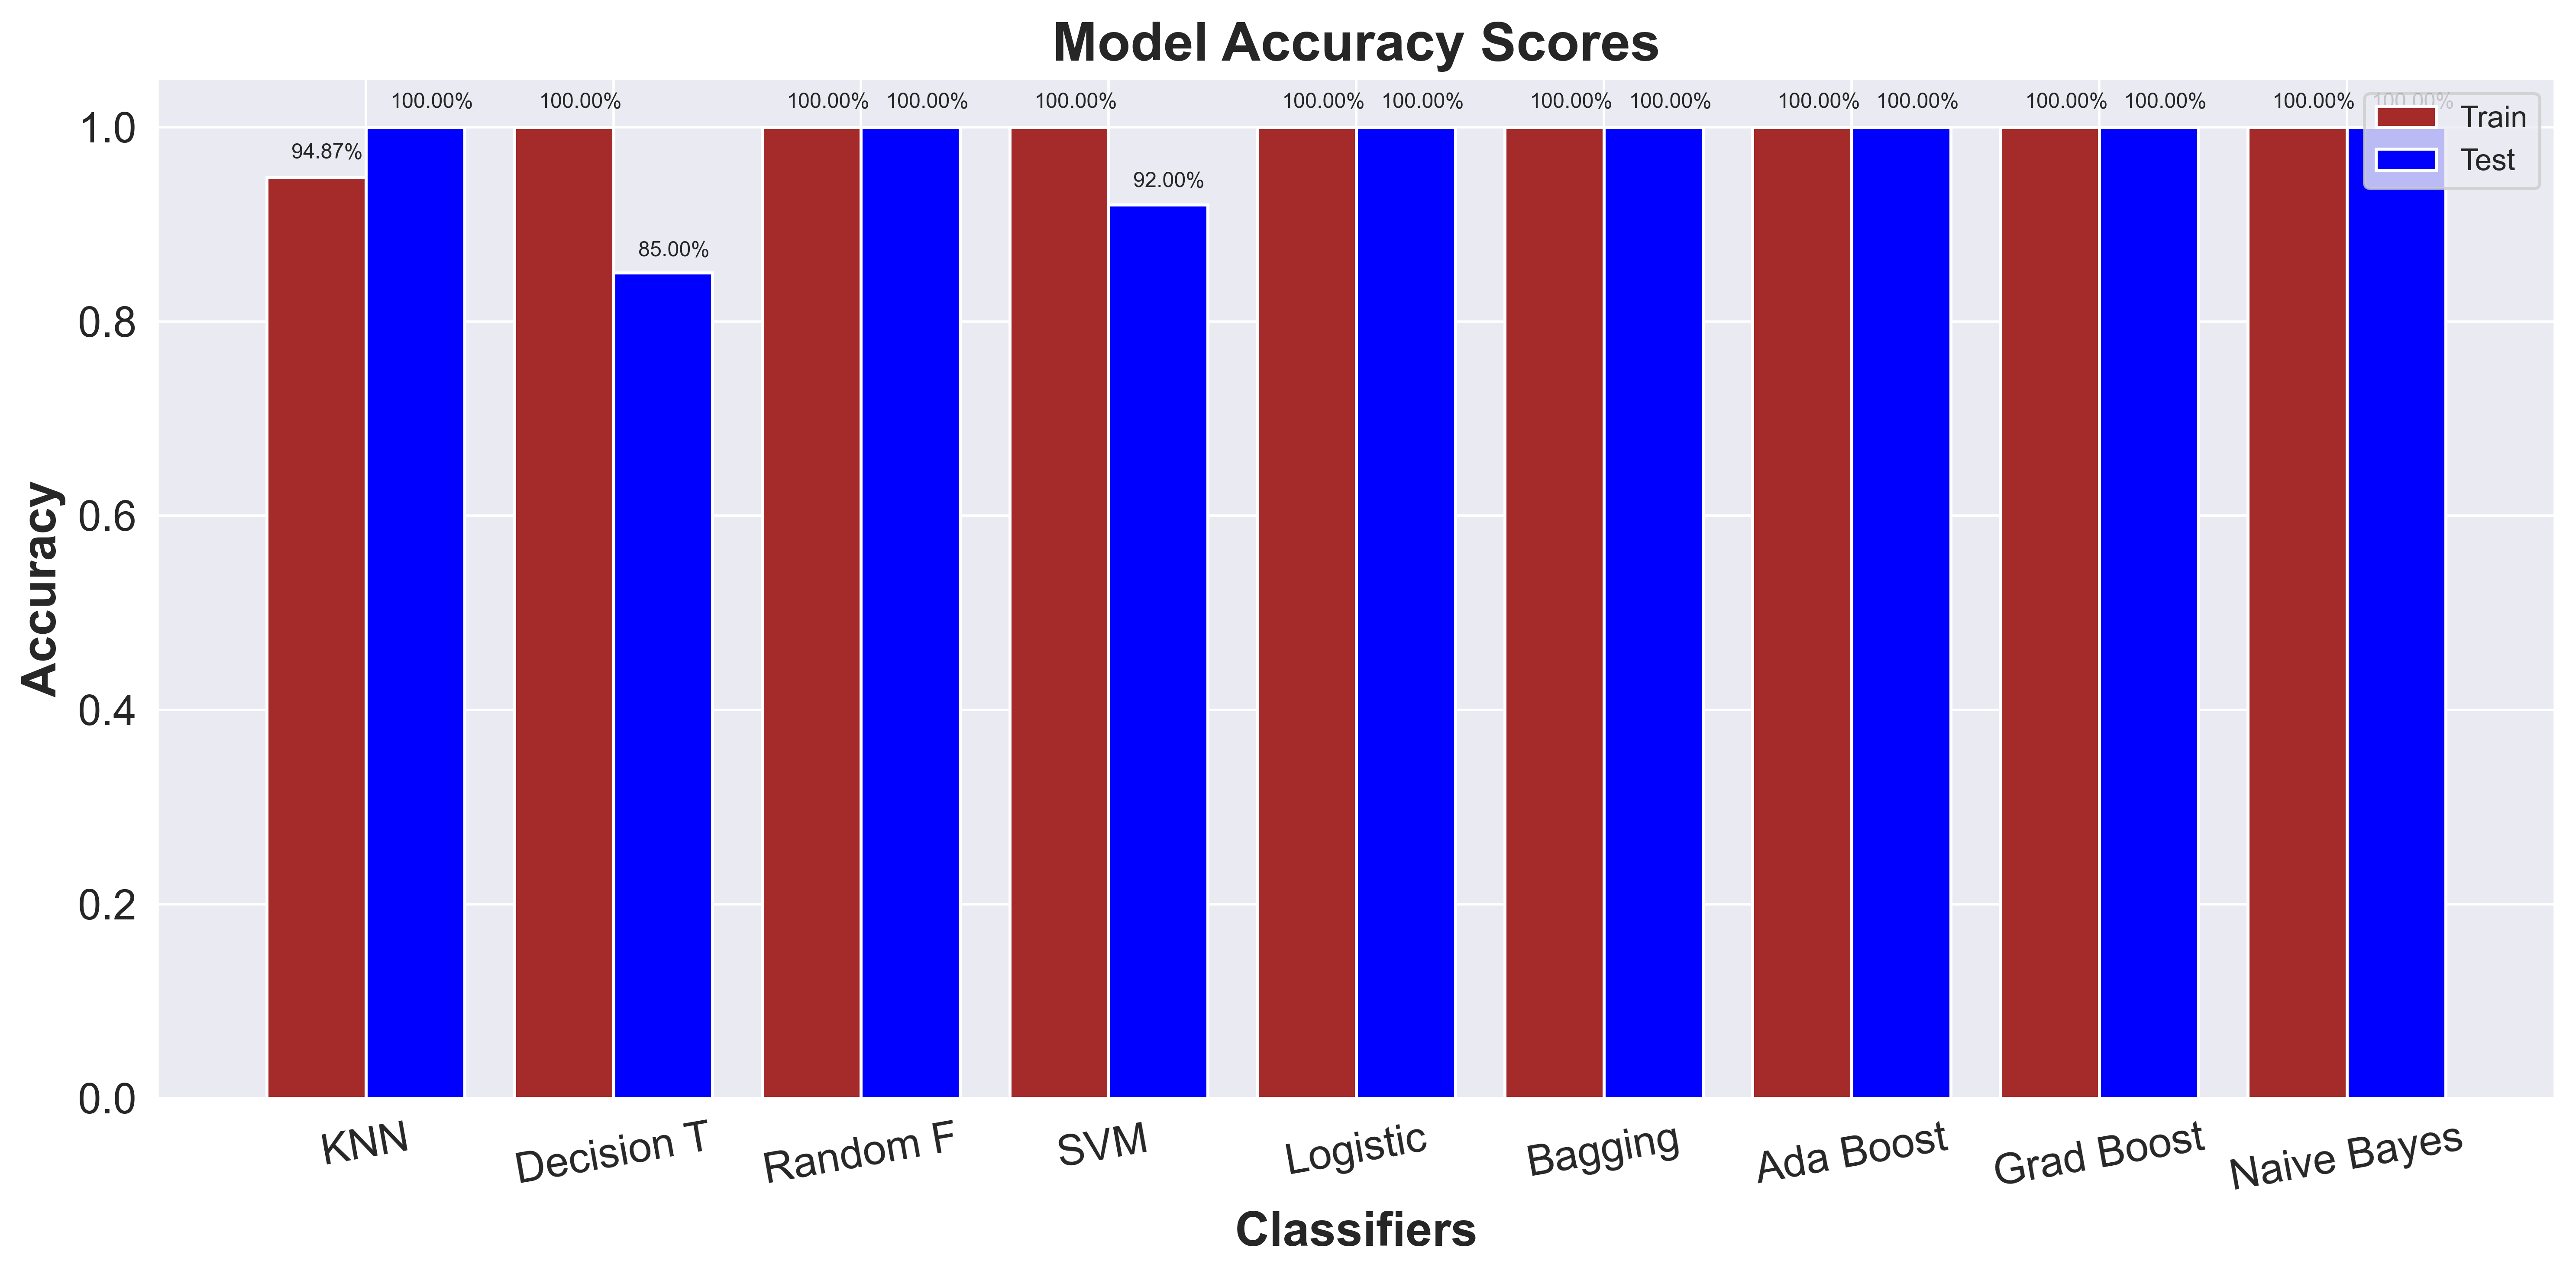

In [82]:
import matplotlib.pyplot as plt
import numpy as np

rcParams = {'xtick.labelsize':'12','ytick.labelsize':'14','axes.labelsize':'16'}
fig, axe = plt.subplots(1,1, figsize=(12,6), dpi=500)
x_pos = np.arange(len(table))
model_names = ["KNN", "Decision T", "Random F", "SVM ", "Logistic", "Bagging", "Ada Boost", "Grad Boost","Naive Bayes"]

bar1 = plt.bar(x_pos - 0.2, table['Train_Accuracy(%)'], width=0.4, label='Train', color= "brown")
bar2 = plt.bar(x_pos + 0.2, table['Test_Accuracy(%)'], width=0.4, label='Test', color= "b")
plt.xticks(x_pos, model_names)

plt.xlabel("Classifiers", fontsize = 16, fontweight = 'bold')
plt.ylabel("Accuracy", fontsize = 16, fontweight = 'bold')
plt.title("Model Accuracy Scores", fontsize = 18, fontweight = 'bold')
plt.xticks(rotation = 10)
plt.legend()

for i, bar in enumerate(bar1):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02, 
             s = '{:.2f}%'.format(Train_accuracies[i]), fontsize = 7)
    
for i, bar in enumerate(bar2):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02, 
             s = '{:.2f}%'.format(Test_accuracies[i]), fontsize = 7)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('Mod_Acc_Bar', dpi = 500)

## Model Deployment

### Pickle File

In [83]:
import pickle
filename = 'modelDT.pkl'
pickle.dump(model_DT,open(filename,'wb'))

In [84]:
import pickle
filename = 'vector.pkl'
pickle.dump(tfidf_vector,open(filename,'wb'))